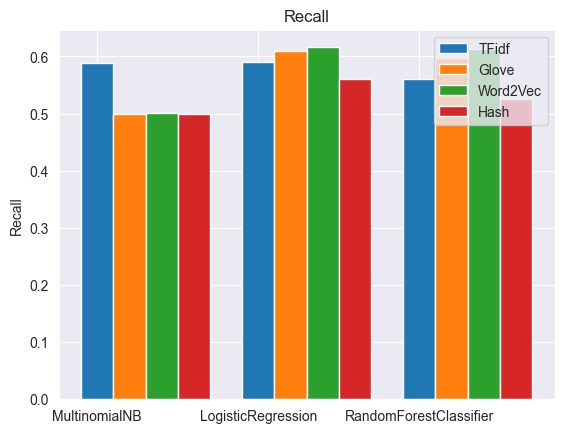

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read the data from CSV file
df = pd.read_csv('performance_280323.csv')

# extract the unique values of 'WordEmbedding' and 'Model'
word_embeddings = df['WordEmbedding'].unique()
models = df['Model'].unique()

# create a dictionary to store the recall values
recall_dict = {we: {m: 0 for m in models} for we in word_embeddings}

# populate the recall values from the dataframe
for _, row in df.iterrows():
    recall_dict[row['WordEmbedding']][row['Model']] = row['Recall']

# plot the grouped bar chart
kriterien = models
vergleichs_kriterien = word_embeddings

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()

for i, we in enumerate(word_embeddings):
    recalls = [recall_dict[we][m] for m in models]
    ax.bar(x + i*width, recalls, width, label=we)

ax.set_xticks(x)
ax.set_xticklabels(kriterien)
ax.set_title("Recall")
ax.set_ylabel("Recall")
ax.legend()

plt.show()

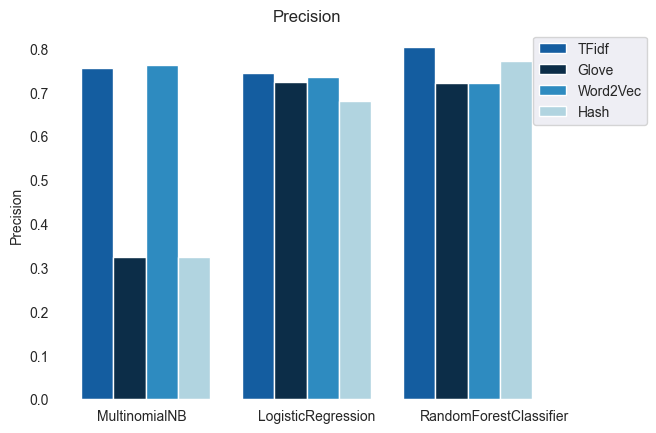

<Figure size 640x480 with 0 Axes>

In [5]:
# create a dictionary to store the recall values
precision_dict = {we: {m: 0 for m in models} for we in word_embeddings}

for _, row in df.iterrows():
    precision_dict[row['WordEmbedding']][row['Model']] = row['Precision']

# plot the grouped bar chart
kriterien = models
vergleichs_kriterien = word_embeddings

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()

colors = ['#145DA0', '#0C2D48', '#2E8BC0', '#B1D4E0']
for i, we in enumerate(word_embeddings):
    precisions = [precision_dict[we][m] for m in models]
    ax.bar(x + i*width, precisions, width, label=we, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(kriterien, ha='left')
ax.set_facecolor("white")
ax.set_title("Precision")
ax.set_ylabel("Precision")
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.show()
plt.savefig('figure.png', transparent=True)

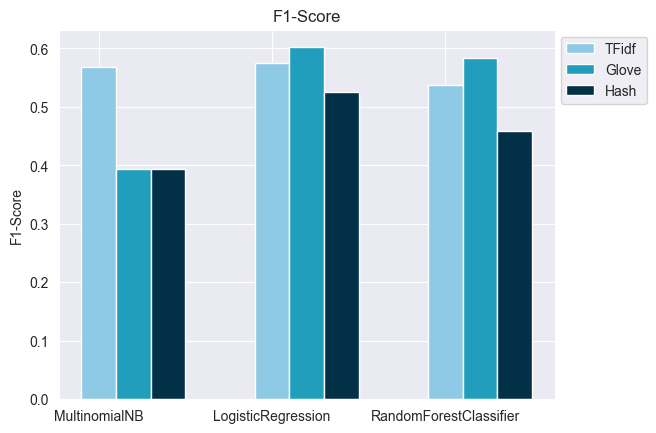

In [14]:
# create a dictionary to store the recall values
f1_score_dict = {we: {m: 0 for m in models} for we in word_embeddings}

for _, row in df.iterrows():
    f1_score_dict[row['WordEmbedding']][row['Model']] = row['F1-Score']

# plot the grouped bar chart
kriterien = models
vergleichs_kriterien = word_embeddings

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()


for i, we in enumerate(word_embeddings):
    f1_scores = [f1_score_dict[we][m] for m in models]
    ax.bar(x + i*width, f1_scores, width, label=we, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(kriterien)
ax.set_title("F1-Score")
ax.set_ylabel("F1-Score")
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.show()